In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

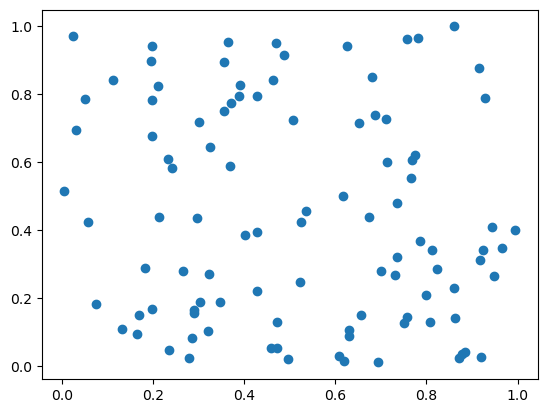

In [55]:
p = np.random.rand(100, 2)
plt.scatter(x = p[:, 0], y = p[:, 1])

In [56]:
from scipy.spatial import distance_matrix

d = distance_matrix(p, p)

idx = set()
stream_size = 10
temperature = 10

while len(idx) < stream_size:
    retries = np.random.randint(0, temperature)
    d_copy = d.copy()
    for _ in range(retries):
        i, j = np.unravel_index(d_copy.argmax(), d.shape)
        d_copy[i, j] = -1
        d_copy[j, i] = -1
    idx.add(i)
    idx.add(j)
    d[i, j] = -1
    d[j, i] = -1

idx = np.array(list(idx))

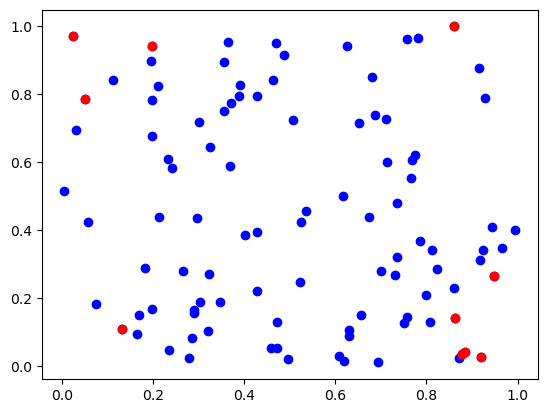

In [57]:
stream_items = p[idx]
plt.scatter(x = p[:, 0], y = p[:, 1], color='blue')
plt.scatter(x = stream_items[:, 0], y = stream_items[:, 1], color='red')

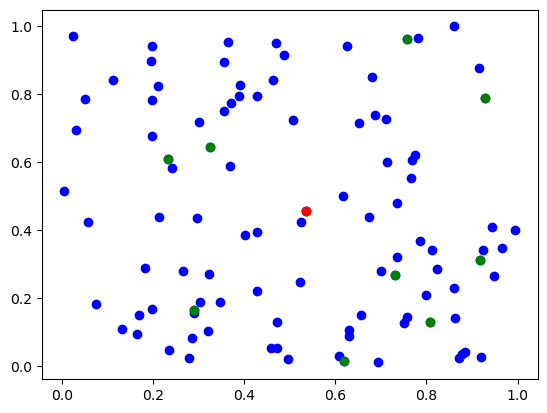

In [89]:
from scipy.spatial import distance_matrix

d = distance_matrix(p, p)

idx_set = set()
free_idx_set = set(range(p.shape[0]))
stream_size = 10
temperature = 10

coords = np.array([[0.5, 0.5]])
d0 = distance_matrix(coords, p)
nearest_idx = d0.argmin()
idx_set.add(nearest_idx)
nearest_item = p[nearest_idx]

while len(idx_set) < stream_size:
    idx = np.array(list(idx_set))
    free_idx = np.array(list(free_idx_set))
    d = distance_matrix(p[idx], p[free_idx])
    d_copy = d.copy()
    for _ in range(temperature):
        i, j = np.unravel_index(d_copy.argmax(), d_copy.shape)
        d_copy[i, j] = -1
    i, j = np.unravel_index(d_copy.argmax(), d_copy.shape)
    d[i, j] = -1
    idx_set.add(i)
    idx_set.add(j)
    if i in free_idx_set:
        free_idx_set.remove(i)
    if j in free_idx_set:
        free_idx_set.remove(j)

idx = np.array(list(idx_set))
stream_items = p[idx]
plt.scatter(x = p[:, 0], y = p[:, 1], color='blue')
plt.scatter(x = stream_items[:, 0], y = stream_items[:, 1], color='green')
plt.scatter(x = nearest_item[0], y = nearest_item[1], color='red')